In [2]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def fence_length(x):
  return x[0] + 2 * x[1]

def con(x):
  return x[0] * x[1] - 1000

In [4]:
abounds = (1, None)
bbounds = (1, None)
bounds = (abounds, bbounds)
cons = ({'type': 'eq', 'fun': con})
result = minimize(fence_length, [1], bounds=bounds, method='slsqp', constraints=cons)
result

     fun: 89.44271933174403
     jac: array([1., 2.])
 message: 'Optimization terminated successfully'
    nfev: 71
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([44.7180441 , 22.36233761])

<center>Перевірка результатів оптимізації:</center>

In [5]:
minimized_square = result.x[0] * result.x[1]
minimized_square

999.9999996856658

In [6]:
minimized_fence_length_by_func = result.fun
minimized_fence_length_by_func

89.44271933174403

In [7]:
minimized_fence_length_manualy = result.x[0] + 2 * result.x[1]
minimized_fence_length_manualy

89.44271933174403

Рандомний (10 у.о. Х 100 у.о.) варіант в 1000 у.о. квадратних має мати більшу довжину паркану ніж мінізований оптимізацієї:

In [8]:
print(fence_length((10,100)) > result.fun) 

True


Відповідь: паркан зі сторонами 22,36 у.о. перпендикулярно річці і 44,72 у.о. вздовж річкі має найменшу довжину

In [9]:
side = np.linspace(1, 100, 100)
river_side = 1000 / side
length = 2 * side + river_side

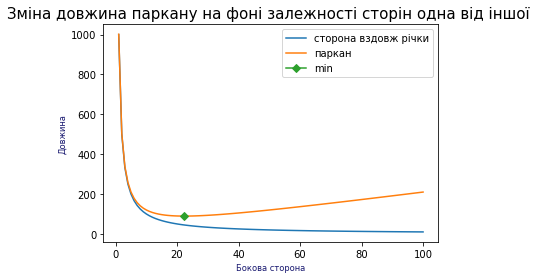

In [10]:
fig, axs = plt.subplots()
plt.title('Зміна довжина паркану на фоні залежності сторін одна від іншої ', fontsize=15)
axs.plot(side, river_side, label='сторона вздовж річки')
axs.plot(side, length, label='паркан')
axs.plot(result.x[1], result.fun, label='min', marker="D")
plt.xlabel("Бокова сторона", fontsize="small", color="midnightblue")
plt.ylabel("Довжина", fontsize="small", color="midnightblue")
plt.legend()
plt.show()